# Regressão linear: testando relações e prevendo resultados

## preparando o ambiente 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## conhecendo o projeto

## O dataset e o projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## importando os dados

In [2]:
dados = pd.read_csv(r'C:\Users\dougl\OneDrive\Área de Trabalho\data science\regressão linear\Alura - Testando relação e prevendo resultados\Aula 0 - Iniciando o Curso\data-science\reg-linear\Dados\Consumo_cerveja.csv')
dados
# problemas com a nomenclatura americana, precisamos mudar o paramêtro

,data;temp_media;temp_min;temp_max;chuva;fds;consumo
0,01/01/2015;27.3;23.9;32.5;0;0;25461
1,02/01/2015;27.02;24.5;33.5;0;0;28972
2,03/01/2015;24.82;22.4;29.9;0;1;30814
3,04/01/2015;23.98;21.5;28.6;1.2;1;29799
4,05/01/2015;23.82;21;28.3;0;0;28900
...,...
360,27/12/2015;24;21.1;28.2;13.6;1;32307
361,28/12/2015;22.64;21.1;26.7;0;0;26095
362,29/12/2015;21.68;20.3;24.1;10.3;0;22309
363,30/12/2015;21.38;19.3;22.4;6.3;0;20467


In [3]:
dados = pd.read_csv(r'C:\Users\dougl\OneDrive\Área de Trabalho\data science\regressão linear\Alura - Testando relação e prevendo resultados\Aula 0 - Iniciando o Curso\data-science\reg-linear\Dados\Consumo_cerveja.csv', sep = ";")
dados


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [4]:
dados.shape
# tamanho do dataset

(365, 7)

## estatisticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [6]:
dados.corr().round(4)
# esse parâmetro nos mostra a correlação de crescimento de cada variavel

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


## comportamento da variável dependente 

In [7]:
x, y = (28, 11)
# criar uma tupla para utilizar no parâmetro a seguir

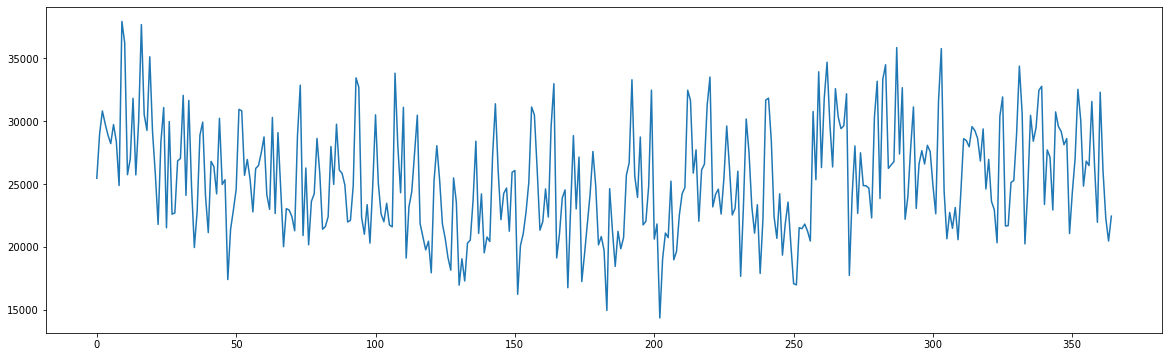

In [8]:
fig, ax = plt.subplots(figsize=(20, 6)) 

ax = dados['consumo'].plot()
# gráfico do consumo ao longo do ano

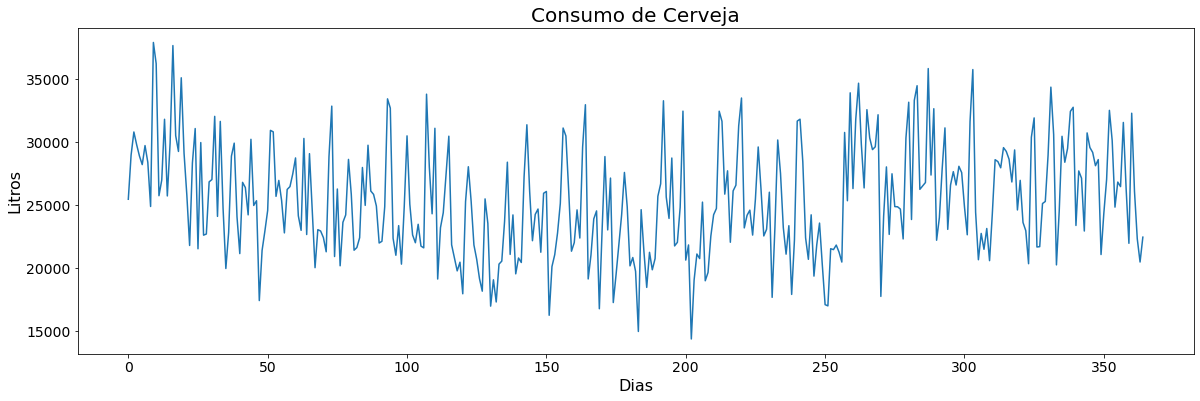

In [9]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)
# customizando o gráfico para melhor visualização 

## boxplot

In [10]:
import seaborn as sns
# importando a biblioteca visual seaborn

<AxesSubplot:>

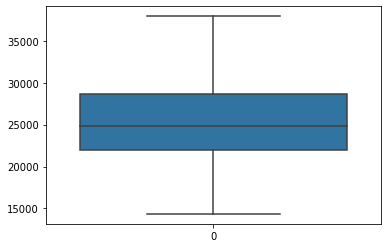

In [11]:
sns.boxplot(data=dados['consumo'])


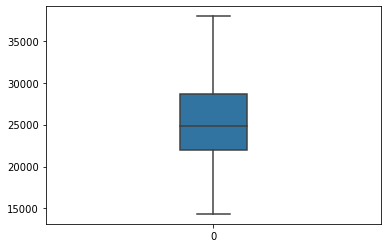

In [12]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
# alterando o tamanho do gráfico e atribuindo uma variável

<AxesSubplot:title={'center':'Consumo de Cerveja'}, ylabel='Litros'>

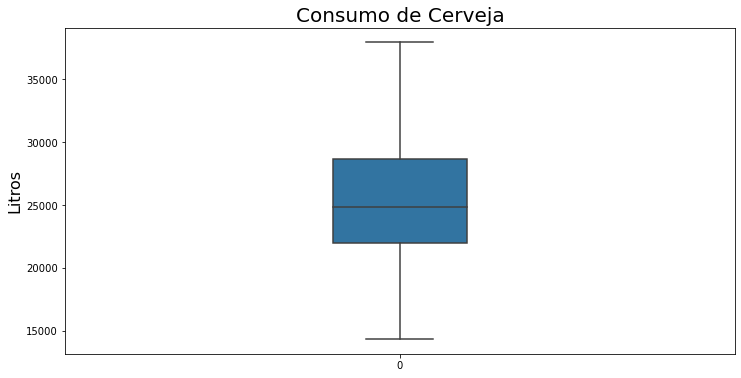

In [13]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja',fontsize = 20)
ax.set_ylabel('Litros',fontsize = 16)
ax

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

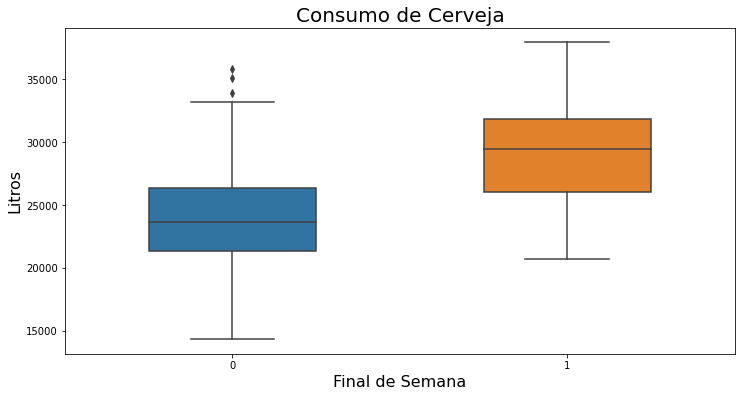

In [14]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

In [15]:
sns.set_palette("Accent")
sns.set_style("darkgrid")
# mudando as cores do grafico

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

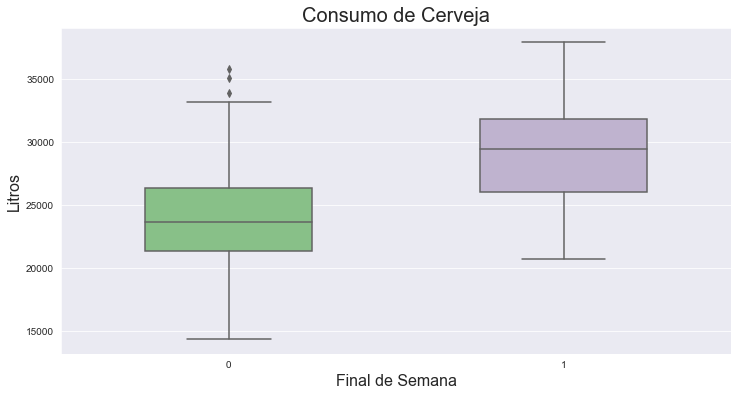

In [16]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax
# agora com novas cores

## distribuição de frequências

c:\Users\dougl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distrubuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja(Litros)'>

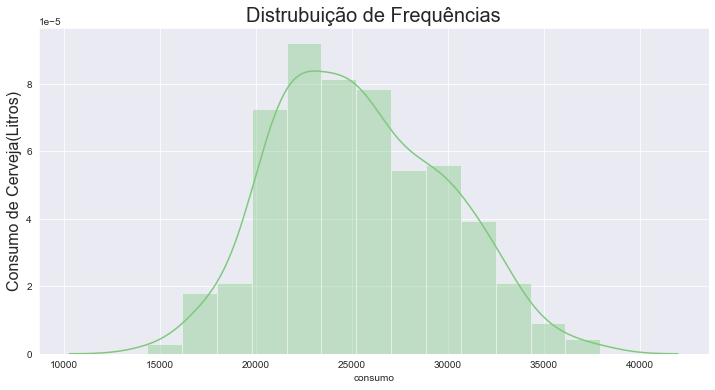

In [17]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

## variável dependente x variável independente (pairplot)

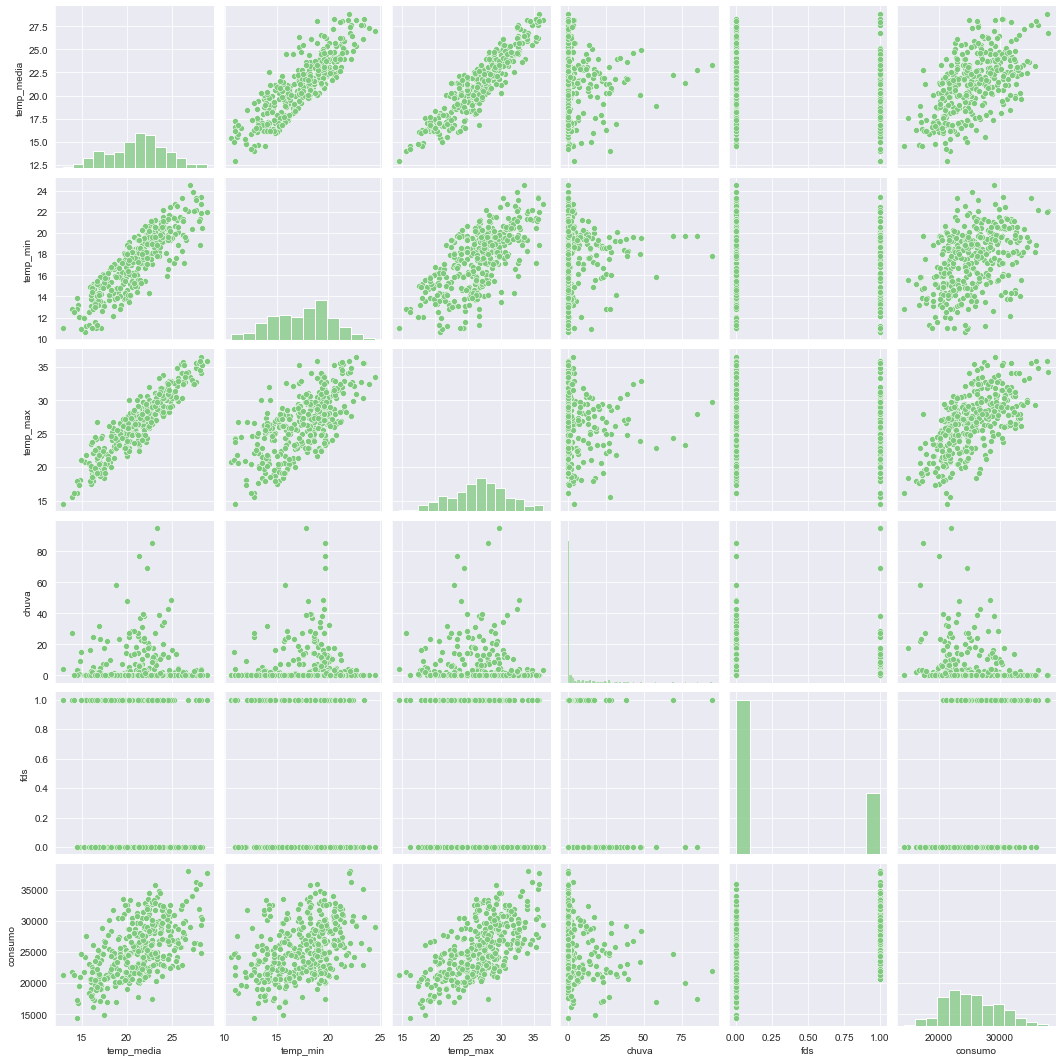

In [18]:
ax = sns.pairplot(dados)

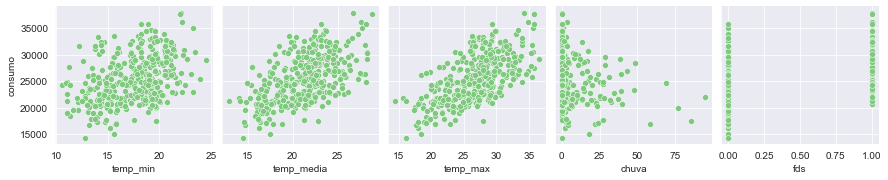

In [19]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
# parâmetro para separar apenas os gráficos relacionados com consumo

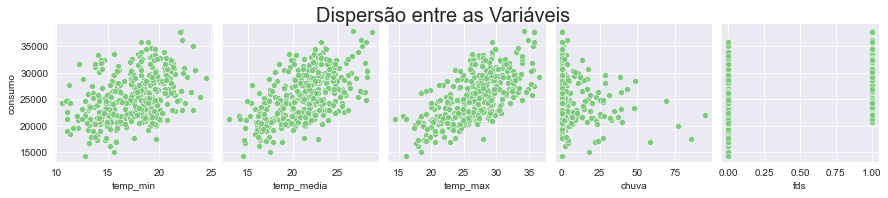

In [20]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.06)
ax
# atribuindo titulo no gráfico 

## variável dependente x variável explicativa (jointplot)

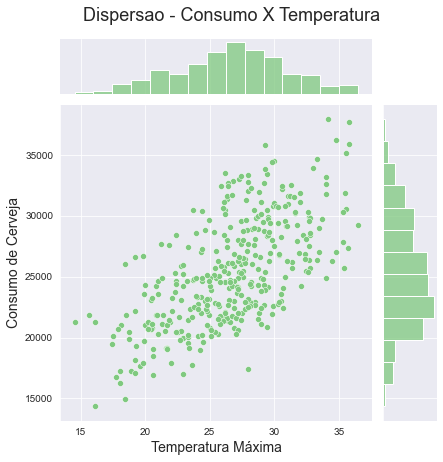

In [21]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

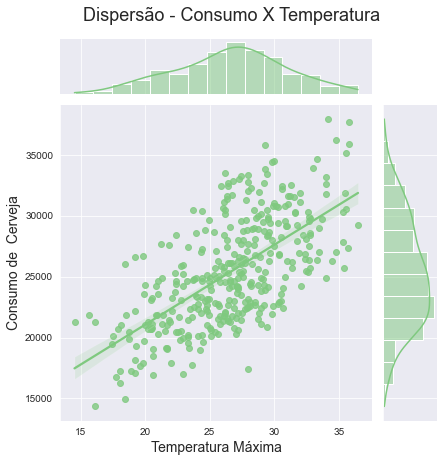

In [22]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

## variável dependente x variável explicativa (lmplot)

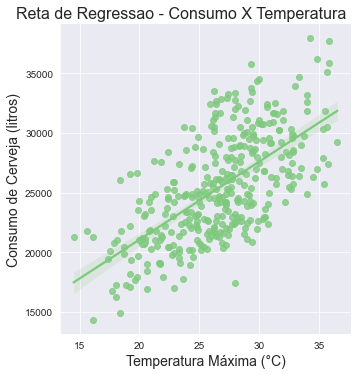

In [23]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

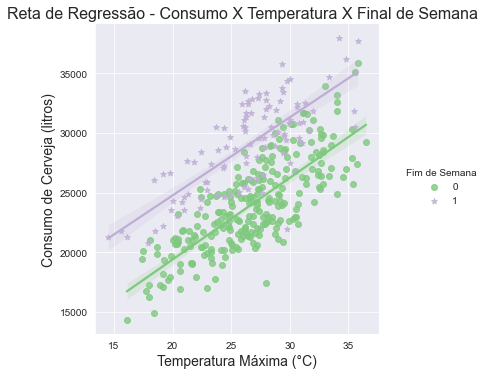

In [24]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

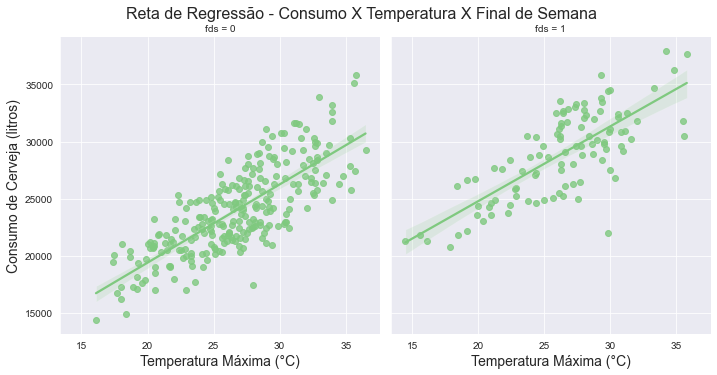

In [25]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## datasets de treino e teste (regressão linear)

In [26]:
from sklearn.model_selection import train_test_split
# importar uma biblióteca de machine learn, o scikit learn 

In [27]:
y = dados['consumo']
# nova variável atrelando a categoria 'consumo'

In [28]:
X = dados[['temp_max', 'chuva', 'fds']]
# mesma situação, atribuindo novas categorias 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)
# criando datasets de treino e de testes

## regressão linear

utilizaremos a seguinte equação         Yi = β1 + β2X2i + β3Xei + β4X4i + Ui

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [31]:
modelo = LinearRegression()

In [32]:
modelo.fit(X_train, y_train)

LinearRegression()

In [33]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [34]:
y_previsto = modelo.predict(X_test)

In [35]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


## obtendo previsões

In [36]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [37]:
modelo.predict(entrada)[0]

26094.901775262017

In [38]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


In [39]:
modelo.intercept_
# intercepto é quando todas as outras variáveis são zero, basicamente quantos litros beberiam indepedente de qualquer coisa

5951.9763393124485

In [40]:
modelo.coef_
# valor dos outros coeficientes da equação 

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [41]:
type(modelo.coef_)
# tipo de variável

numpy.ndarray

In [42]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [43]:
index = ['Intercepto','Temperatura Máxima', 'Chuva(mm)', 'Final de Semana']

In [44]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


## análises gráficas das previsões do modelo

In [45]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

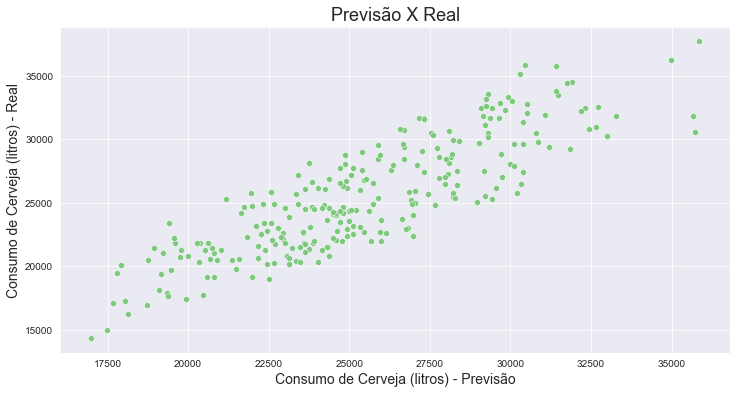

In [46]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [47]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

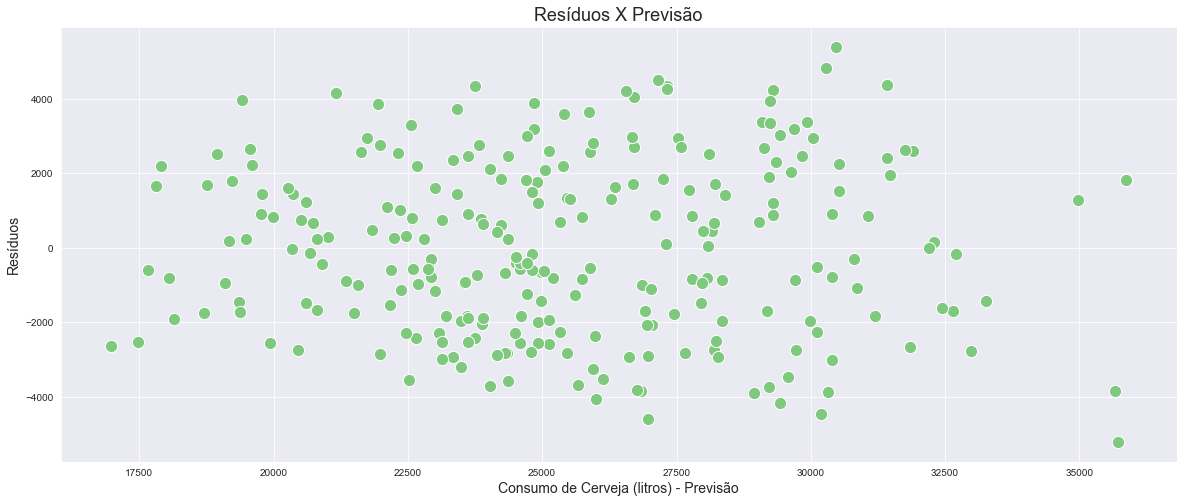

In [48]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

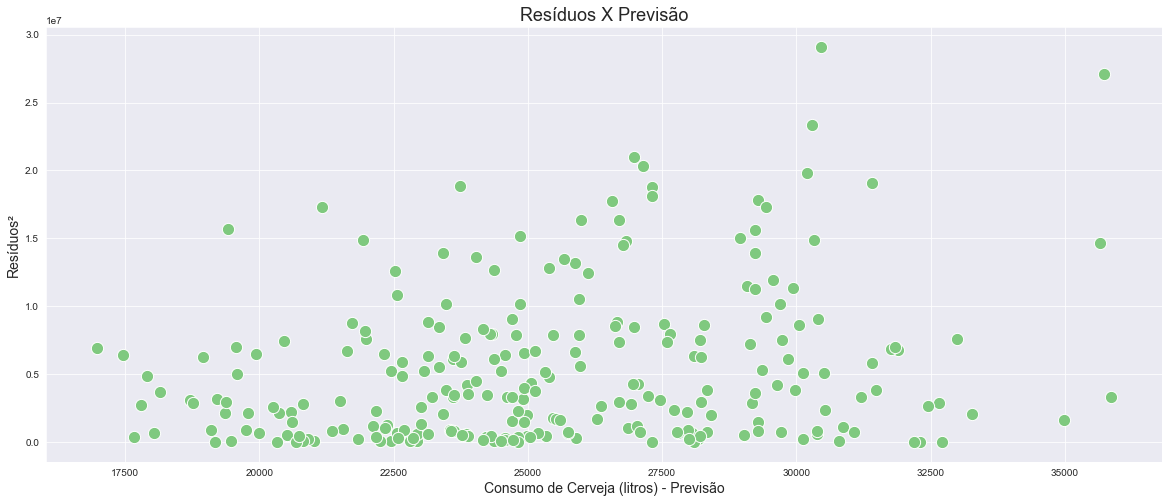

In [49]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

c:\Users\dougl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

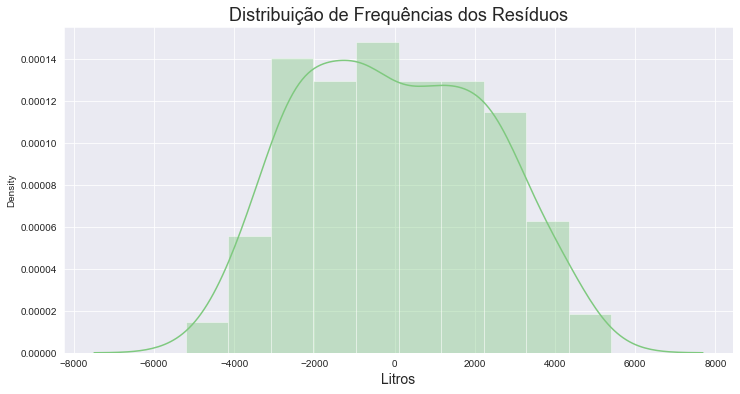

In [50]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

## comparando modelos

In [51]:
X2 = dados[['temp_media', 'chuva', 'fds']]
# novo modelo, agora utilizando temperatura média ao invés de máxima

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [53]:
modelo_2 = LinearRegression()

In [54]:
modelo_2.fit(X2_train, y2_train)


LinearRegression()

In [55]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [56]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [57]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [58]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## conclusão

esse foi um treino básico para a utilização de regressão linear, com a linguagem python. Bons estudos!!